# Playing with the toy data from Kaggle

## **Step 1** : Set the working directory

In [22]:
setwd('C:/R')

## **Step 2** : Read the data from the directory

In [119]:
toy <- read.csv('toy.csv', header=T, sep=',')

In [120]:
df <- data.frame(toy)

## **Step 3** : See if the data is read well

In [121]:
head(df)

Number,City,Gender,Age,Income,Illness
<int>,<fct>,<fct>,<int>,<dbl>,<fct>
1,Dallas,Male,41,40367,No
2,Dallas,Male,54,45084,No
3,Dallas,Male,42,52483,No
4,Dallas,Male,40,40941,No
5,Dallas,Male,46,50289,No
6,Dallas,Female,36,50786,No


In [122]:
# Remove Number column
df <- df[, -1]

In [123]:
# Make sure the Number column is gone
tail(df)

,City,Gender,Age,Income,Illness
,<fct>,<fct>,<int>,<dbl>,<fct>
149995,Austin,Female,37,106097,No
149996,Austin,Male,48,93669,No
149997,Austin,Male,25,96748,No
149998,Austin,Male,26,111885,No
149999,Austin,Male,25,111878,No
150000,Austin,Female,37,87251,No


In [124]:
dim(df)

[1] 150000      5

## **Step 4** : Summarize the data for basic descriptive statistics

In [125]:
summary(df)

            City          Gender           Age            Income      
 New York City:50307   Female:66200   Min.   :25.00   Min.   :  -654  
 Los Angeles  :32173   Male  :83800   1st Qu.:35.00   1st Qu.: 80868  
 Dallas       :19707                  Median :45.00   Median : 93655  
 Mountain View:14219                  Mean   :44.95   Mean   : 91253  
 Austin       :12292                  3rd Qu.:55.00   3rd Qu.:104519  
 Boston       : 8301                  Max.   :65.00   Max.   :177157  
 (Other)      :13001                                                  
 Illness     
 No :137861  
 Yes: 12139  
             
             
             
             
             

In [126]:
attach(df)

The following objects are masked _by_ .GlobalEnv:

    Age, Gender, Illness, Income

The following objects are masked from df (pos = 3):

    Age, Gender, Illness, Income

The following objects are masked from df (pos = 4):

    Age, City, Gender, Illness, Income

The following objects are masked from df (pos = 5):

    Age, City, Gender, Illness, Income



In [127]:
class(df$Age)

[1] "integer"

In [128]:
class(df$Gender)

[1] "factor"

In [129]:
class(df$Illness)

[1] "factor"

In [130]:
class(df$Income)

[1] "numeric"

### Q. Which city is most populated in this data?

In [132]:
table(City)

City
         Austin          Boston          Dallas     Los Angeles   Mountain View 
          12292            8301           19707           32173           14219 
  New York City       San Diego Washington D.C. 
          50307            4881            8120 

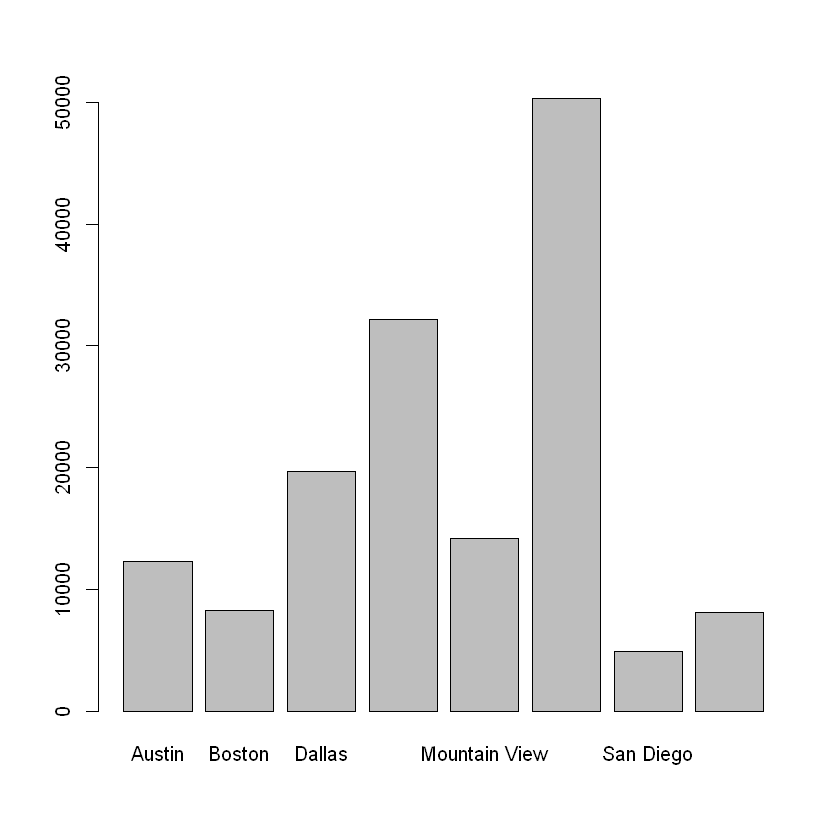

In [133]:
# Visualize the table
plot(City)

### Q. How is age distributed throughout the data?

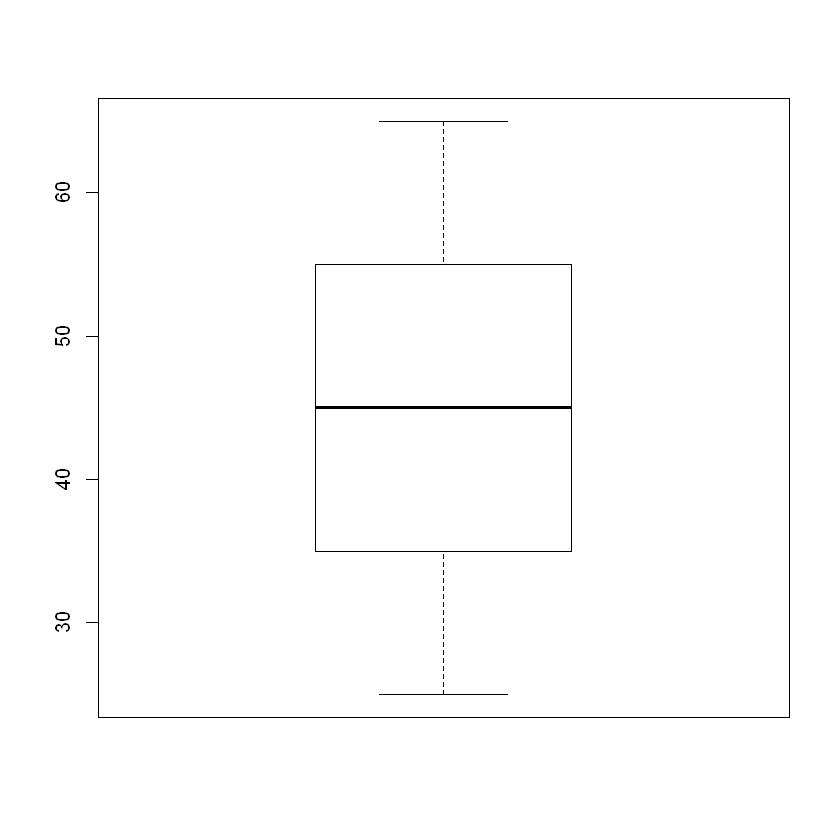

In [134]:
# Mean and Median being both 45, age is almost equally distributed around them.
boxplot(Age, data=df)

## **Step 5** : Make hypotheses such as:
1. 'Age' is correlated with 'Illness', *which is quite plausible in common sense.*
2. 'City' is correlated with 'Income', as the cost of living is usually high in cities.


## **Step 6** : Check if the hypotheses are true

In [135]:
# Convert factor variables into numeric values for regression
df$Gender <- as.numeric(df$Gender)
df$Illness <- as.numeric(df$Illness)

### Q. Is Age related to Illness?

In [146]:
ill.lm <- lm(df$Illness ~ ., data=df)

In [147]:
summary(ill.lm)


Call:
lm(formula = df$Illness ~ ., data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.08464 -0.08200 -0.08048 -0.07959  0.92180 

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)          1.078e+00  6.771e-03 159.125   <2e-16 ***
CityBoston           3.439e-04  3.876e-03   0.089    0.929    
CityDallas           6.173e-04  4.451e-03   0.139    0.890    
CityLos Angeles     -2.556e-03  2.914e-03  -0.877    0.380    
CityMountain View   -4.421e-04  4.604e-03  -0.096    0.924    
CityNew York City   -2.481e-03  2.783e-03  -0.891    0.373    
CitySan Diego       -1.785e-03  4.672e-03  -0.382    0.702    
CityWashington D.C.  4.536e-04  4.129e-03   0.110    0.913    
Gender               4.856e-04  1.583e-03   0.307    0.759    
Age                  4.278e-05  6.085e-05   0.703    0.482    
Income               2.293e-08  7.025e-08   0.326    0.744    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual s

In [148]:
# None of the variables are statistically significant, as all P values are more than 0.05.
anova(ill.lm)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
City,7,2.193963e-01,0.031342322,0.4213747,0.8896212
Gender,1,1.871647e-02,0.018716465,0.2516293,0.6159309
Age,1,3.679750e-02,0.036797504,0.4947157,0.4818323
Income,1,7.927393e-03,0.007927393,0.1065780,0.7440746
Residuals,149989,1.115635e+04,0.074381110,NA,NA


### Q. Is Income related to City?

In [149]:
income.lm <- lm(df$Income ~ ., data=df)

In [150]:
# Residents in all cities in this data enjoy high level of income.
# Usually male earn higher income than female.
summary(income.lm)


Call:
lm(formula = df$Income ~ ., data = df)

Residuals:
   Min     1Q Median     3Q    Max 
-41909  -6764     28   6795  49112 

Coefficients:
                      Estimate Std. Error  t value Pr(>|t|)    
(Intercept)          7.458e+04  1.880e+02  396.750   <2e-16 ***
CityBoston           1.371e+03  1.424e+02    9.626   <2e-16 ***
CityDallas          -4.499e+04  1.152e+02 -390.448   <2e-16 ***
CityLos Angeles      5.046e+03  1.063e+02   47.463   <2e-16 ***
CityMountain View    4.483e+04  1.235e+02  363.112   <2e-16 ***
CityNew York City    6.606e+03  1.009e+02   65.490   <2e-16 ***
CitySan Diego        1.040e+04  1.696e+02   61.293   <2e-16 ***
CityWashington D.C. -1.928e+04  1.434e+02 -134.467   <2e-16 ***
Gender               1.000e+04  5.213e+01  191.896   <2e-16 ***
Age                  9.437e-01  2.237e+00    0.422    0.673    
Illness              3.099e+01  9.491e+01    0.326    0.744    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard e

In [151]:
# City and Gender variables are statistically significant, as P values of both variables are less than 0.05.
anova(income.lm)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
City,7,7.489568e+13,1.069938e+13,1.064603e+05,0.0000000
Gender,1,3.700863e+12,3.700863e+12,3.682407e+04,0.0000000
Age,1,1.793942e+07,1.793942e+07,1.784996e-01,0.6726665
Illness,1,1.071122e+07,1.071122e+07,1.065780e-01,0.7440746
Residuals,149989,1.507407e+13,1.005012e+08,NA,NA


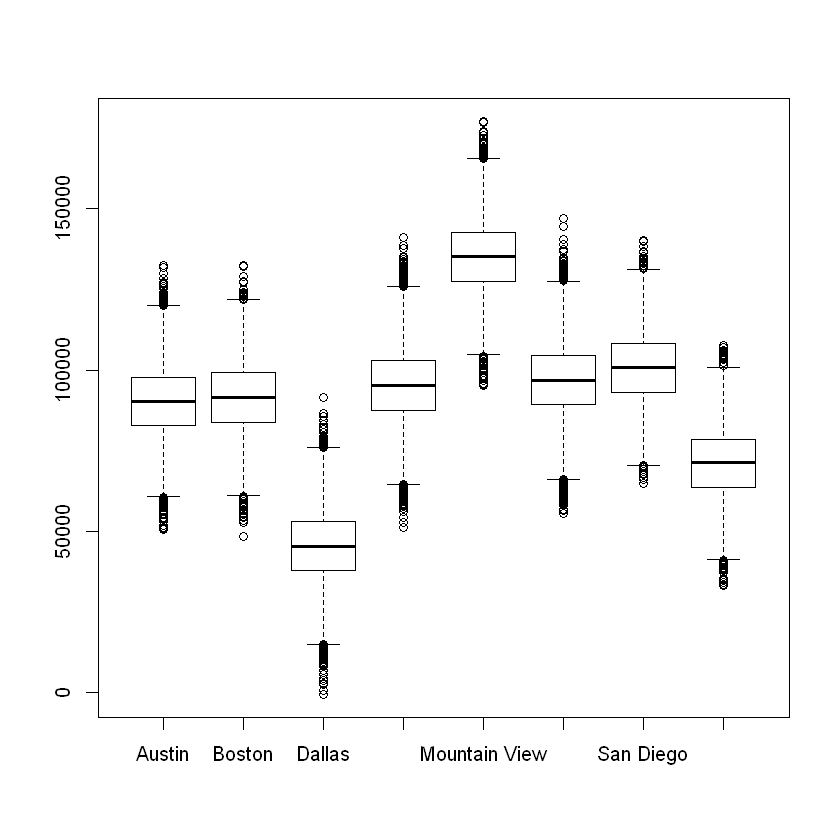

In [161]:
boxplot(df$Income~df$City, data=df, cex.names=.3)

### **Step 7** : Result

- From the first linear regression(ill.lm), it doesn't show any sign of relationship between 'Age' and 'Illness', at least in these data.

- From the second linear regression(income.lm), it is seen that 'Income' has correlations with all 8 'Cities', probably because all 'Cities' here are some of most largest cities in the United States.

- It is also shown that 'Male' are likely to make more income than 'Female'.

### Step 8 : Thoughts

- I need to get more familiar with data frame in R.
- I should probably work with R for statistical analysis solely, and visualize the result with Python.

* This dataset is acquired from Carlo Lepelaars at Kaggle.
<br> https://www.kaggle.com/carlolepelaars/toy-dataset